**Première partie : l’algorithme SVM**

In [15]:
import numpy as np

#2
import pandas as pd
df = pd.read_csv('cell_samples.csv')

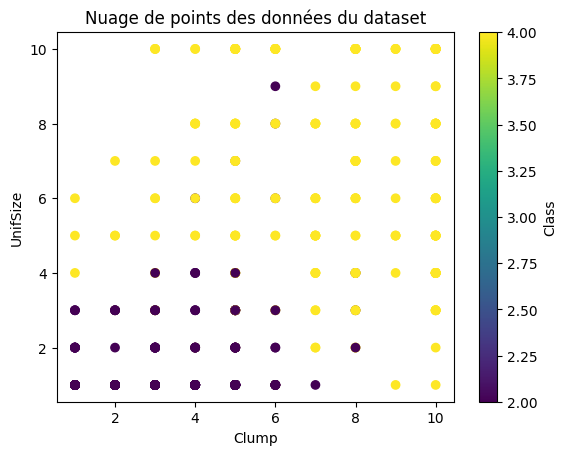

In [16]:
#3
df.head(2)

import matplotlib.pyplot as plt
# Créer le nuage de points
plt.scatter(df['Clump'], df['UnifSize'], c=df['Class'], cmap='viridis', marker='o')

# Ajouter des étiquettes aux axes
plt.xlabel('Clump')
plt.ylabel('UnifSize')

# Afficher la figure
plt.colorbar(label='Class')
plt.title('Nuage de points des données du dataset')
plt.show()

In [17]:
#4
print(df.dtypes)

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


In [18]:
#5
import pandas as pd

# Charger le dataset
df = pd.read_csv('cell_samples.csv')

# Afficher les premières lignes du dataset
print("Initial Data:")
print(df.info())

# Afficher les valeurs uniques de la colonne BareNuc
print("Unique values in BareNuc before conversion:")
print(df['BareNuc'].unique())

# Remplacer les valeurs non numériques ou manquantes par NaN
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')
print("Unique values in BareNuc after conversion to numeric:")
print(df['BareNuc'].unique())

# Afficher les valeurs NaN dans la colonne BareNuc
print("Rows with NaN values in BareNuc:")
print(df[df['BareNuc'].isna()])

# Remplacer les NaN par la médiane de la colonne BareNuc
df['BareNuc'].fillna(df['BareNuc'].median(), inplace=True)
print("Rows with NaN values in BareNuc after filling with median:")
print(df[df['BareNuc'].isna()])

# Convertir la colonne BareNuc en entier
df['BareNuc'] = df['BareNuc'].astype(int)

# Vérifier les types de données pour chaque colonne
print("Data types after conversion:")
print(df.dtypes)

# Afficher les premières lignes du dataset final
print("Final Data:")
print(df.info())

Initial Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
Unique values in BareNuc before conversion:
['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
Unique values in BareNuc after conversion to numeric:
[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]
Rows with NaN values in BareNuc:
          ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  Bar

In [19]:
#6
X = df.drop('Class', axis=1)
y = df['Class']

In [20]:
#7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#8
from sklearn.svm import SVC


In [22]:
#9
model = SVC(kernel='rbf')

In [23]:
#10
model.fit(X_train, y_train)


SVC()

In [24]:
#11
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[95  0]
 [45  0]]
              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#12
kernels = ['linear', 'poly', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
#13
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)

y_pred = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

**Deuxième partie : **

In [1]:
#1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/Social_Network_Ads.csv')
print(dataset.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [5]:
#3/a
dataset.drop(columns=['User ID'], inplace=True)
print(dataset.head())



   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


b/Le feature scaling est souvent important pour les algorithmes de classification basés sur des distances (comme KNN et SVM) mais peut être moins crucial pour d'autres algorithmes comme les arbres de décision et les forêts aléatoires. Cependant, pour uniformiser notre approche, nous effectuerons le scaling pour tous les modèles.

In [9]:
#c
X = dataset.drop(columns=['Purchased'])
y = dataset['Purchased']

# Encodage de la colonne Gender
label_encoder = LabelEncoder()
X['Gender'] = label_encoder.fit_transform(X['Gender'])

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = [
    ('Logistic Regression', LogisticRegression()),
    ('GaussianNB', GaussianNB()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier()),
    ('ExtraTrees', ExtraTreesClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('KNeighbors', KNeighborsClassifier()),
    ('LDA', LinearDiscriminantAnalysis()),
    ('SVC', SVC(probability=True)),
    ('Bagging', BaggingClassifier())
]

# Standardisation des features - Apply only to models that require it
def evaluate_model(name, model):
    if name in ['Logistic Regression', 'KNeighbors', 'LDA', 'SVC']:
        # Scale data for these models
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    else:
        # No scaling for these models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}" if roc_auc is not None else "ROC AUC: N/A")
    print("-" * 30)

    return model

# Évaluation des modèles
fitted_models = {}
for name, model in models:
    fitted_models[name] = evaluate_model(name, model)

Model: Logistic Regression
Accuracy: 0.89
Precision: 0.91
Recall: 0.75
ROC AUC: 0.97
------------------------------
Model: GaussianNB
Accuracy: 0.94
Precision: 0.93
Recall: 0.89
ROC AUC: 0.99
------------------------------
Model: DecisionTree
Accuracy: 0.84
Precision: 0.80
Recall: 0.71
ROC AUC: 0.81
------------------------------
Model: RandomForest
Accuracy: 0.91
Precision: 0.86
Recall: 0.89
ROC AUC: 0.95
------------------------------
Model: ExtraTrees
Accuracy: 0.91
Precision: 0.86
Recall: 0.89
ROC AUC: 0.94
------------------------------
Model: GradientBoosting
Accuracy: 0.88
Precision: 0.85
Recall: 0.79
ROC AUC: 0.95
------------------------------
Model: AdaBoost
Accuracy: 0.90
Precision: 0.92
Recall: 0.79
ROC AUC: 0.97
------------------------------
Model: XGBoost
Accuracy: 0.88
Precision: 0.82
Recall: 0.82
ROC AUC: 0.95
------------------------------
Model: KNeighbors
Accuracy: 0.93
Precision: 0.87
Recall: 0.93
ROC AUC: 0.95
------------------------------
Model: LDA
Accuracy: 0.

le modèle avec la meilleure performance est  Gaussian Naive Bayes

In [14]:
#d + e
models_param_grids = [
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    }),
    ('GaussianNB', GaussianNB(), {}),
    ('DecisionTree', DecisionTreeClassifier(), {
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini', 'entropy']
    }),
    ('RandomForest', RandomForestClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini', 'entropy']
    }),
    ('ExtraTrees', ExtraTreesClassifier(), {
        'n_estimators': [100, 200, 300],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30],
        'criterion': ['gini', 'entropy']
    }),
    ('GradientBoosting', GradientBoostingClassifier(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }),
    ('AdaBoost', AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    }),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    }),
    ('KNeighbors', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    ('LDA', LinearDiscriminantAnalysis(), {
        'solver': ['svd', 'lsqr', 'eigen']
    }),
    ('SVC', SVC(probability=True), {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }),
    ('Bagging', BaggingClassifier(), {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    })
]


def evaluate_and_save_model(name, model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print("-" * 30)

    joblib.dump(best_model, f'best_{name.lower().replace(" ", "_")}_model.pkl')
    return best_model

for name, model, param_grid in models_param_grids:
    evaluate_and_save_model(name, model, param_grid)


Model: Logistic Regression
Best Parameters: {'C': 1, 'solver': 'saga'}
------------------------------
Model: GaussianNB
Best Parameters: {}
------------------------------
Model: DecisionTree
Best Parameters: {'criterion': 'entropy', 'max_depth': 30}
------------------------------
Model: RandomForest
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}
------------------------------
Model: ExtraTrees
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}
------------------------------
Model: GradientBoosting
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
------------------------------
Model: AdaBoost
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
------------------------------
Model: XGBoost
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
------------------------------
Model: KNeighbors
Best Parameters: {'metric': '